In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
sns.set (style= 'whitegrid', color_codes = True)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv(r"C:\Users\gradadm09\Desktop\Natalie\Wayfair-Babson_HackathonData 2019.csv")

In [3]:
data.head()

,VisitDate,UniqueVisitID,VisitorGroup,PlatformUsed,VisitSource,BrowserName,OSName,State,Gender,IncomeRange,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket,Purchased
0,7/1/2017,2014237601010030,Prior Visitor with Purchase,Web,ThirdPartyAds,Chrome,Mac OS X,NY,Female,100to250k,0,0,1,0,0,0,0,0
1,7/1/2017,2909699474086000,New Visitor,Phone,WebSearch,Safari,iOS,NaN,NaN,NaN,1,0,9,0,230,0,0,0
2,7/1/2017,2987400996435030,New Visitor,Web,WebSearch,Chrome,Windows,NaN,NaN,NaN,0,0,28,0,10412,0,0,0
3,7/1/2017,6875972920873110,Prior Visitor with Purchase,Phone,EmailFromWayfair,Safari,iOS,WA,Female,100to250k,1,1,8,1,430,0,0,0
4,7/1/2017,11534913004844900,New Visitor,Phone,ThirdPartyAds,Safari,iOS,NaN,NaN,NaN,1,1,9,0,1158,0,0,0


In [4]:
#data.isnull().sum()

In [5]:
# Purchasing rate among all:2.54
round(data['Purchased'].sum()/data.shape[0] * 100,2)

2.54

In [6]:
# Of those Clicked Banner, how many Purchased: 3.4 % ( If they clicked the banner, they are more likely to purchase)
clicked = data[data['ClickedBanner'] == 1]
round(clicked['Purchased'].sum() / clicked.shape[0] * 100, 2)

3.42

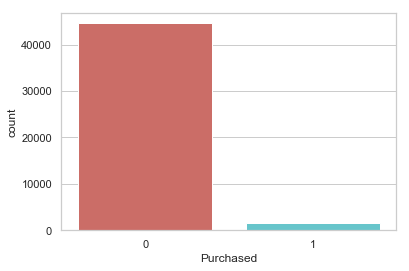

<Figure size 432x288 with 0 Axes>

In [7]:
sns.countplot(x = 'Purchased', data =  clicked, palette = 'hls')
plt.show()
plt.savefig('Affect of ClickedBanner')

In [8]:
# Of those not Clicked Banner, how many Purchased: 2.50 %
not_clicked = data[data['ClickedBanner'] != 1]
round(not_clicked['Purchased'].sum() / not_clicked.shape[0] * 100, 2)

2.5

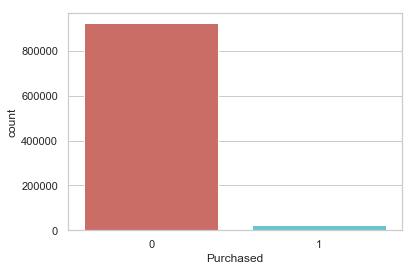

<Figure size 432x288 with 0 Axes>

In [9]:
sns.countplot(x = 'Purchased', data =  not_clicked, palette = 'hls')
plt.show()
plt.savefig('Affect of NOT ClickedBanner')

In [10]:
# Build logistic regression to see what affect 

In [11]:
category_vars= ['Pclass','Sex','SibSp','Parch','Embarked']
df = pd.get_dummies(df, columns = category_vars, drop_first = True)

NameError: name 'df' is not defined

In [ ]:
data.columns

In [ ]:
#category_vars = ['VisitorGroup', 'PlatformUsed', 'Gender','VisitSource', 'BrowserName', 'OSName']
category_vars = ['VisitorGroup']


In [ ]:
data = pd.get_dummies(data, columns = category_vars, drop_first = True)

In [ ]:
X = data.loc[:,data.columns != 'Purchased'].values
y = data.iloc[:,-1].values

In [ ]:
#data.drop(['UniqueVisitID','VisitDate'], axis = 1, inplace = True)

In [ ]:
data.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 30)

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X_train, y_train)

In [ ]:
y_predict = log_reg.predict(X_test)

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_predict)
confusion_matrix

In [ ]:
print(classification_report(y_test, y_predict))